In [21]:
import pandas as pd
import ephem

In [29]:
# Function to calculate sun altitude for each timestamp
def calculate_sun_altitude(lat, lon, timestamps):
    # Initialize observer
    observer = ephem.Observer()
    observer.lat = str(lat)
    observer.lon = str(lon)

    # Initialize the Sun object
    sun = ephem.Sun()

    # Store results
    altitude_data = []

    for timestamp in timestamps:
        observer.date = timestamp

        # Compute the position of the sun for the observer at the given time
        sun.compute(observer)

        # Altitude is in degrees (-90 to 90), where 90 is zenith and 0 is on the horizon
        altitude = sun.alt / ephem.degree  # Convert altitude to degrees

        # Set altitude below 0 to 0
        if altitude < 0:
            altitude = 0.0

        altitude_data.append(altitude)

    # Create a DataFrame with raw altitudes
    altitude_df = pd.DataFrame({'timestamp': timestamps, 'sun_altitude': altitude_data})

    # Normalize the altitude (max altitude is 90 degrees)
    altitude_df['normalized_sun_altitude'] = altitude_df['sun_altitude'] / 75.648184

    return altitude_df

# Latitude and longitude for the given location
lat, lon = 37.7897, -122.3972

# Generate 4-minute interval timestamps from Jun 21, 2023, to Jun 20, 2024
timestamps = pd.date_range(start="2023-06-21 19:57:00", end="2024-06-20 01:51:00", freq='4min')

# Calculate sun altitude for the entire time range
sun_altitude_df = calculate_sun_altitude(lat, lon, timestamps)

# Save the result to a CSV
sun_altitude_df.to_csv('normalized_sun_altitude_data_jun2023_to_jun2024.csv', index=False)

# Display the first few rows
print(sun_altitude_df.head())


            timestamp  sun_altitude  normalized_sun_altitude
0 2023-06-21 19:57:00     75.323463                 0.995707
1 2023-06-21 20:01:00     75.479382                 0.997769
2 2023-06-21 20:05:00     75.586131                 0.999180
3 2023-06-21 20:09:00     75.642597                 0.999926
4 2023-06-21 20:13:00     75.648184                 1.000000


In [30]:
sun_altitude_df.max()

timestamp                  2024-06-20 01:49:00
sun_altitude                         75.648184
normalized_sun_altitude                    1.0
dtype: object

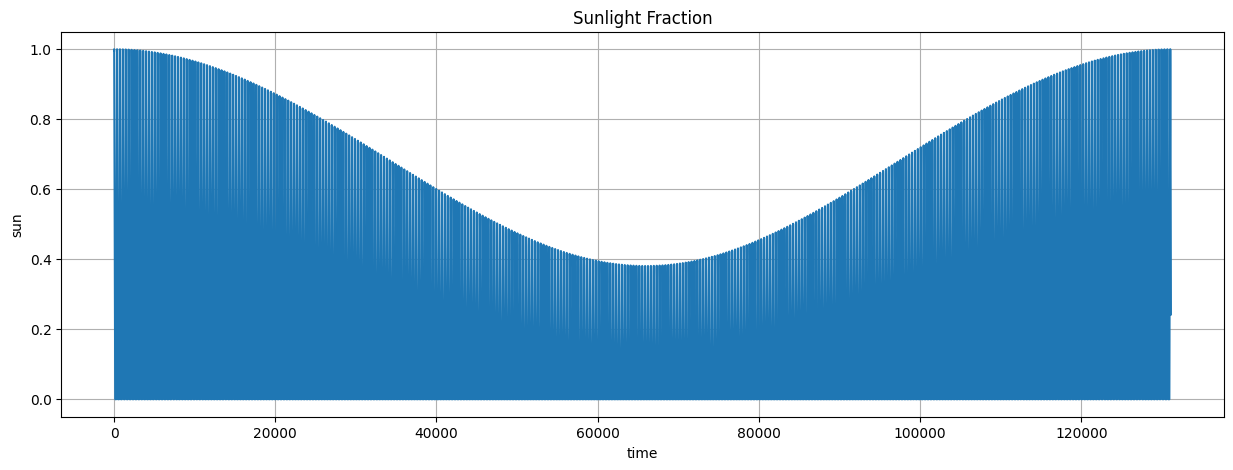

In [32]:
plt.figure(figsize=(15, 5))

plt.plot(sun_altitude_df.index, sun_altitude_df['normalized_sun_altitude'])
plt.title('Sunlight Fraction')
plt.xlabel('time')
plt.ylabel('sun')
plt.grid(True)
#my_dpi = 150
#plt.savefig("sturmflut_wind.png", dpi=my_dpi * 1)
plt.show()

In [33]:
sun_altitude_df.shape

(131129, 3)